<a href="https://colab.research.google.com/github/seanmmhh/Loan_Approval/blob/main/loan_approval_model_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
taweilo_loan_approval_classification_data_path = kagglehub.dataset_download('taweilo/loan-approval-classification-data')

print('Data source import complete.')


###  **Loan Approval Model**  

Binary classification model to predict loan approval

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-classification-data/loan_data.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-classification-data


In [ ]:
# Load data
rawdata_df = pd.read_csv(os.path.join(path,'loan_data.csv'))
print(rawdata_df.head())
print(rawdata_df.info())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [ ]:
# rename columns
print(list(rawdata_df.columns))
old_cols = list(rawdata_df.columns)
new_cols = ['age', 'gender', 'education', 'income', 'emp_hist', 'home_status',
            'loan_amt', 'loan_purpose', 'loan_interest', 'lti_ratio', 'credit_hist',
            'credit_score', 'default_prev', 'loan_status']
name_dict = dict(zip(old_cols, new_cols))
print(name_dict)

rawdata_df.rename(columns=name_dict,
          inplace=True)
print(list(rawdata_df.columns))

['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
{'person_age': 'age', 'person_gender': 'gender', 'person_education': 'education', 'person_income': 'income', 'person_emp_exp': 'emp_hist', 'person_home_ownership': 'home_status', 'loan_amnt': 'loan_amt', 'loan_intent': 'loan_purpose', 'loan_int_rate': 'loan_interest', 'loan_percent_income': 'lti_ratio', 'cb_person_cred_hist_length': 'credit_hist', 'credit_score': 'credit_score', 'previous_loan_defaults_on_file': 'default_prev', 'loan_status': 'loan_status'}
['age', 'gender', 'education', 'income', 'emp_hist', 'home_status', 'loan_amt', 'loan_purpose', 'loan_interest', 'lti_ratio', 'credit_hist', 'credit_score', 'default_prev', 'loan_status']


In [ ]:
# change data types
# define categorical columns
cat_cols = ['gender', 'education', 'home_status', 'loan_purpose', 'default_prev']
print(cat_cols)

# define numerical columns
num_cols = ['age', 'income', 'emp_hist', 'loan_amt', 'loan_interest', 'lti_ratio',
            'credit_hist', 'credit_score', 'loan_status']
print(num_cols)

# define datatype. numerical cols are already integer type
for i in cat_cols:
    rawdata_df[i] = rawdata_df[i].astype('category')

for j in ['age', 'emp_hist', 'credit_hist', 'credit_score']:
    rawdata_df[j] = rawdata_df[j].astype('int64')

for k in ['income', 'loan_amt', 'loan_interest', 'lti_ratio']:
    rawdata_df[k] = rawdata_df[k].astype('float64')

rawdata_df.info()

['gender', 'education', 'home_status', 'loan_purpose', 'default_prev']
['age', 'income', 'emp_hist', 'loan_amt', 'loan_interest', 'lti_ratio', 'credit_hist', 'credit_score', 'loan_status']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45000 non-null  int64   
 1   gender         45000 non-null  category
 2   education      45000 non-null  category
 3   income         45000 non-null  float64 
 4   emp_hist       45000 non-null  int64   
 5   home_status    45000 non-null  category
 6   loan_amt       45000 non-null  float64 
 7   loan_purpose   45000 non-null  category
 8   loan_interest  45000 non-null  float64 
 9   lti_ratio      45000 non-null  float64 
 10  credit_hist    45000 non-null  int64   
 11  credit_score   45000 non-null  int64   
 12  default_prev   45000 non-null  category
 13  loan_status    45000 n

In [ ]:
# descriptive stats - numerical
rawdata_df.describe()

,age,income,emp_hist,loan_amt,loan_interest,lti_ratio,credit_hist,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# descriptive stats - categorical
rawdata_df.describe(include = ["category"])

,gender,education,home_status,loan_purpose,default_prev
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

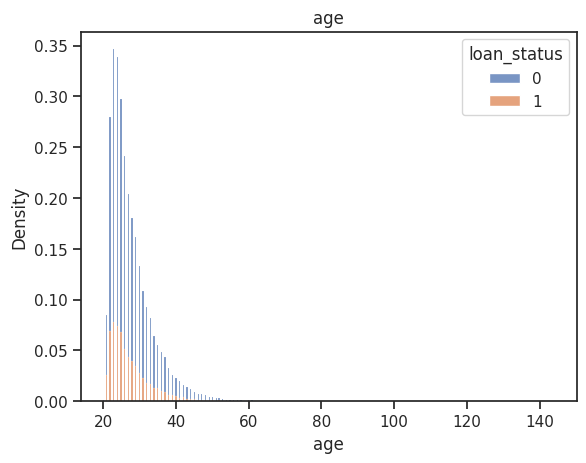

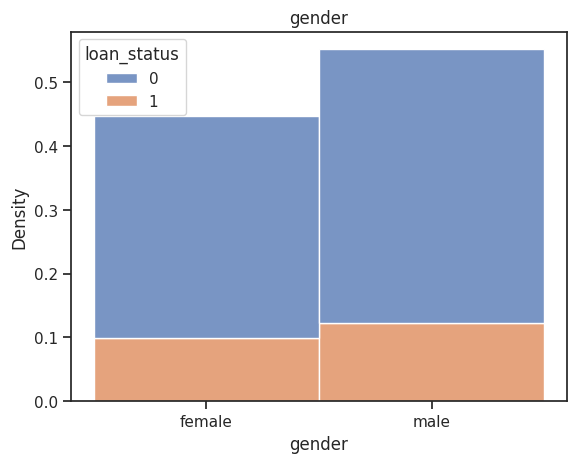

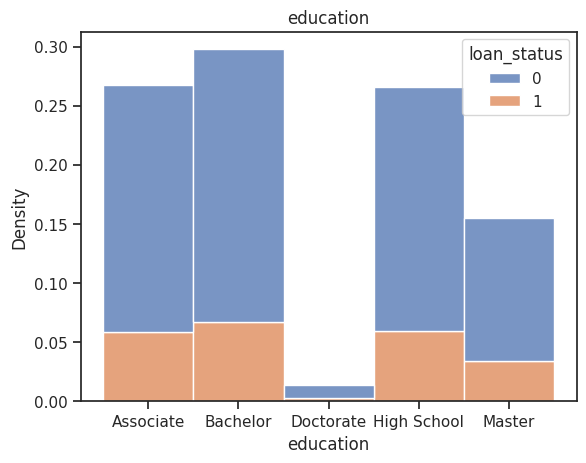

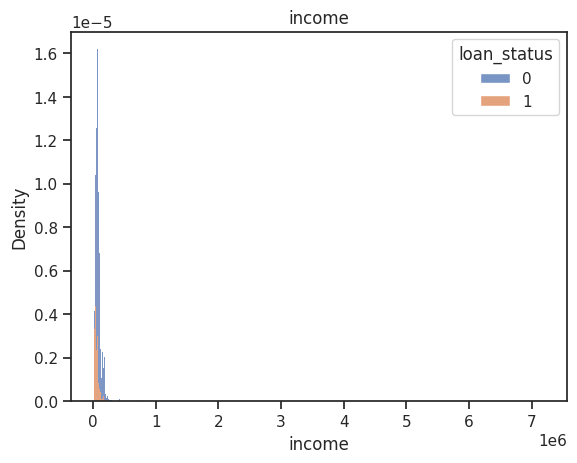

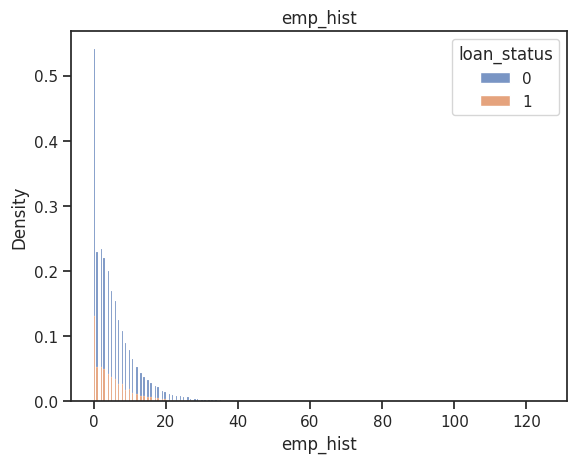

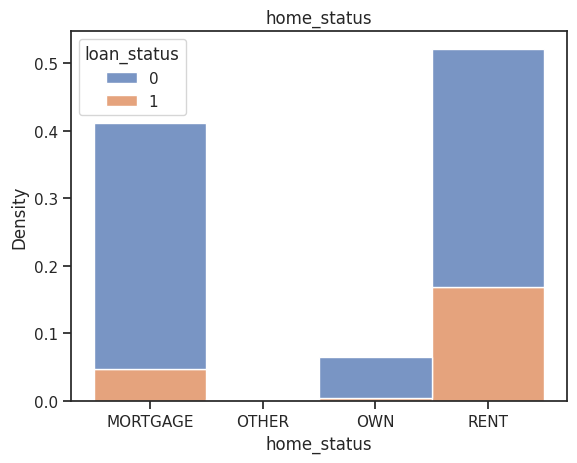

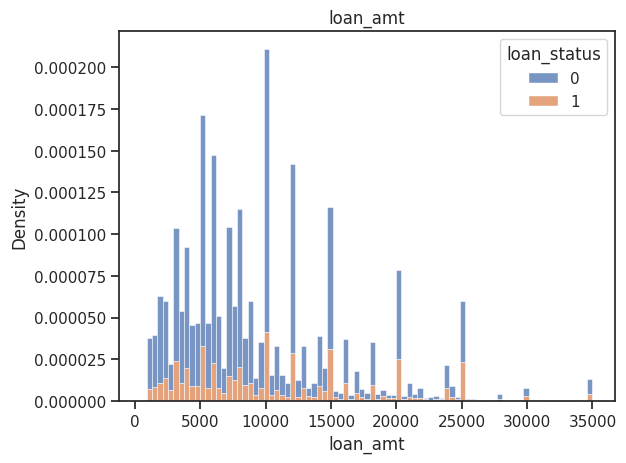

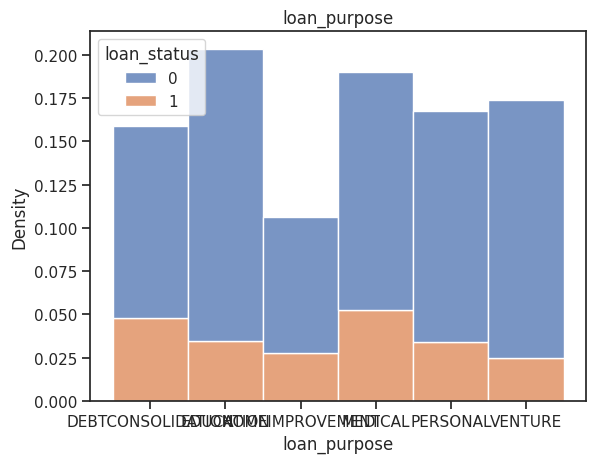

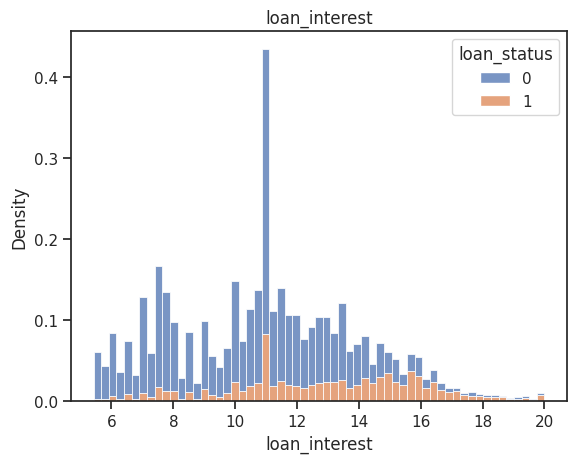

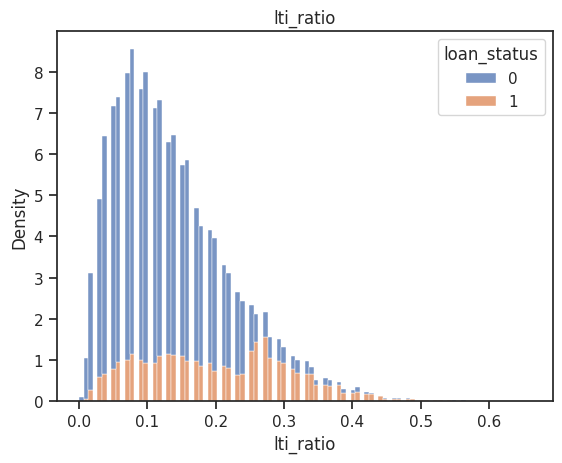

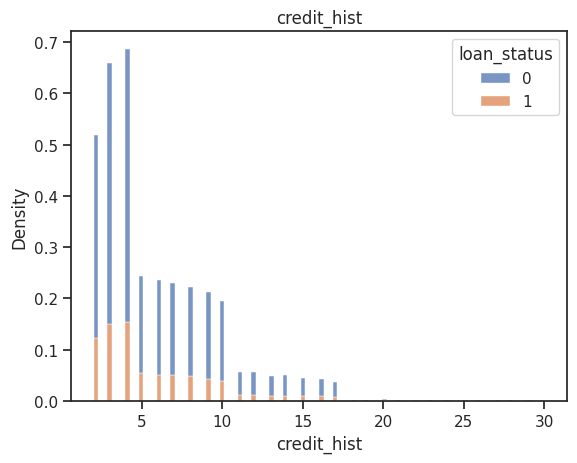

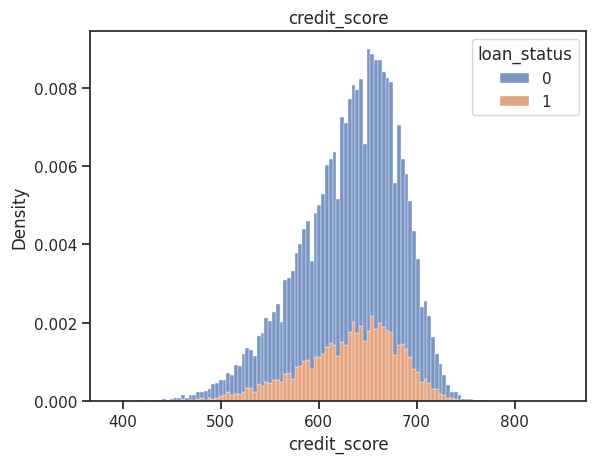

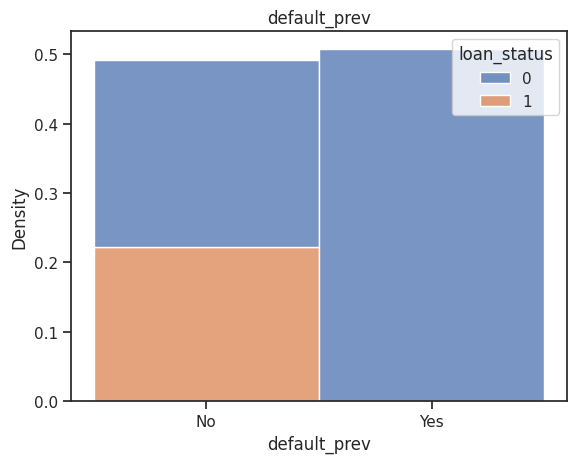

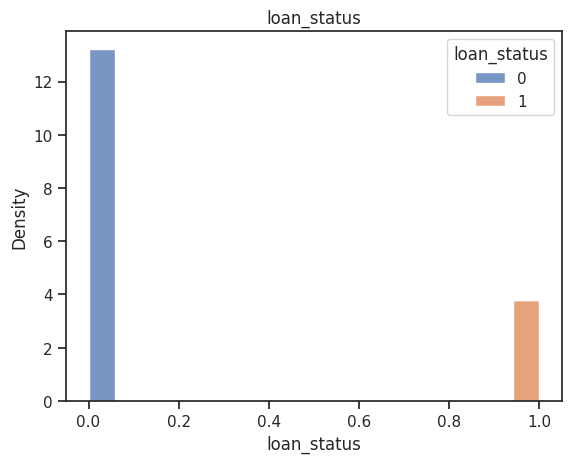

In [ ]:
# histogram of all columns
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(rawdata_df.columns):
    plt.figure(i)
    plt.title(rawdata_df[col].name)
    sns.histplot(data=rawdata_df, x=col, hue="loan_status", multiple="stack", stat='density')

In [ ]:
# create train - test datasets
# train 80% 36k, test 20% 9k
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(rawdata_df, test_size=0.2, random_state=42)
print(traindf.info())
print(testdf.info())

# separate target from features
y_train = pd.DataFrame(traindf.pop('loan_status'))
X_traina = traindf

y_test = pd.DataFrame(testdf.pop('loan_status'))
X_testa = testdf

print(X_traina.info())
print(y_train.info())
print(X_testa.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 25180 to 15795
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            36000 non-null  int64   
 1   gender         36000 non-null  category
 2   education      36000 non-null  category
 3   income         36000 non-null  float64 
 4   emp_hist       36000 non-null  int64   
 5   home_status    36000 non-null  category
 6   loan_amt       36000 non-null  float64 
 7   loan_purpose   36000 non-null  category
 8   loan_interest  36000 non-null  float64 
 9   lti_ratio      36000 non-null  float64 
 10  credit_hist    36000 non-null  int64   
 11  credit_score   36000 non-null  int64   
 12  default_prev   36000 non-null  category
 13  loan_status    36000 non-null  int64   
dtypes: category(5), float64(4), int64(5)
memory usage: 2.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 37979 to 5321
Data columns (total 14 columns)

                    age    income  emp_hist  loan_amt  loan_interest  \
age            1.000000  0.206636  0.953926  0.053231       0.014728   
income         0.206636  1.000000  0.199449  0.229946       0.003457   
emp_hist       0.953926  0.199449  1.000000  0.047076       0.018456   
loan_amt       0.053231  0.229946  0.047076  1.000000       0.148872   
loan_interest  0.014728  0.003457  0.018456  0.148872       1.000000   
lti_ratio     -0.041535 -0.225909 -0.037695  0.590625       0.127655   
credit_hist    0.861121  0.127006  0.822347  0.046456       0.019407   
credit_score   0.174030  0.039745  0.182207  0.013280       0.013597   

               lti_ratio  credit_hist  credit_score  
age            -0.041535     0.861121      0.174030  
income         -0.225909     0.127006      0.039745  
emp_hist       -0.037695     0.822347      0.182207  
loan_amt        0.590625     0.046456      0.013280  
loan_interest   0.127655     0.019407      0.013597  
lti_ratio       1.000000   

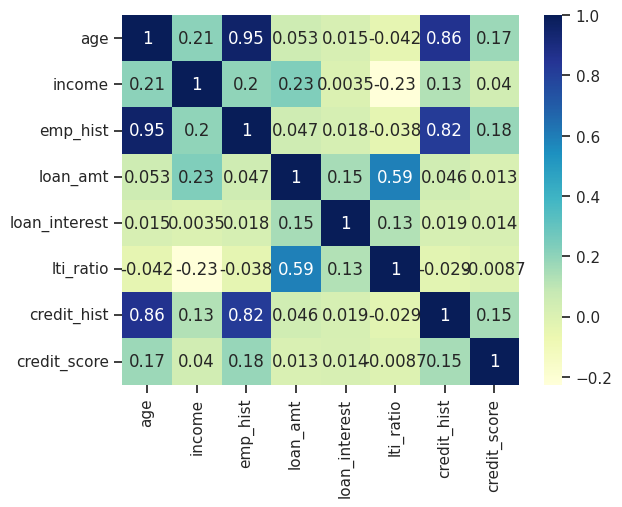

In [ ]:
# feature correlation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num_corr_cols = ['age', 'income', 'emp_hist', 'loan_amt', 'loan_interest', 'lti_ratio',
            'credit_hist', 'credit_score']

co_mtx = X_traina[num_corr_cols].corr()
print(co_mtx)
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

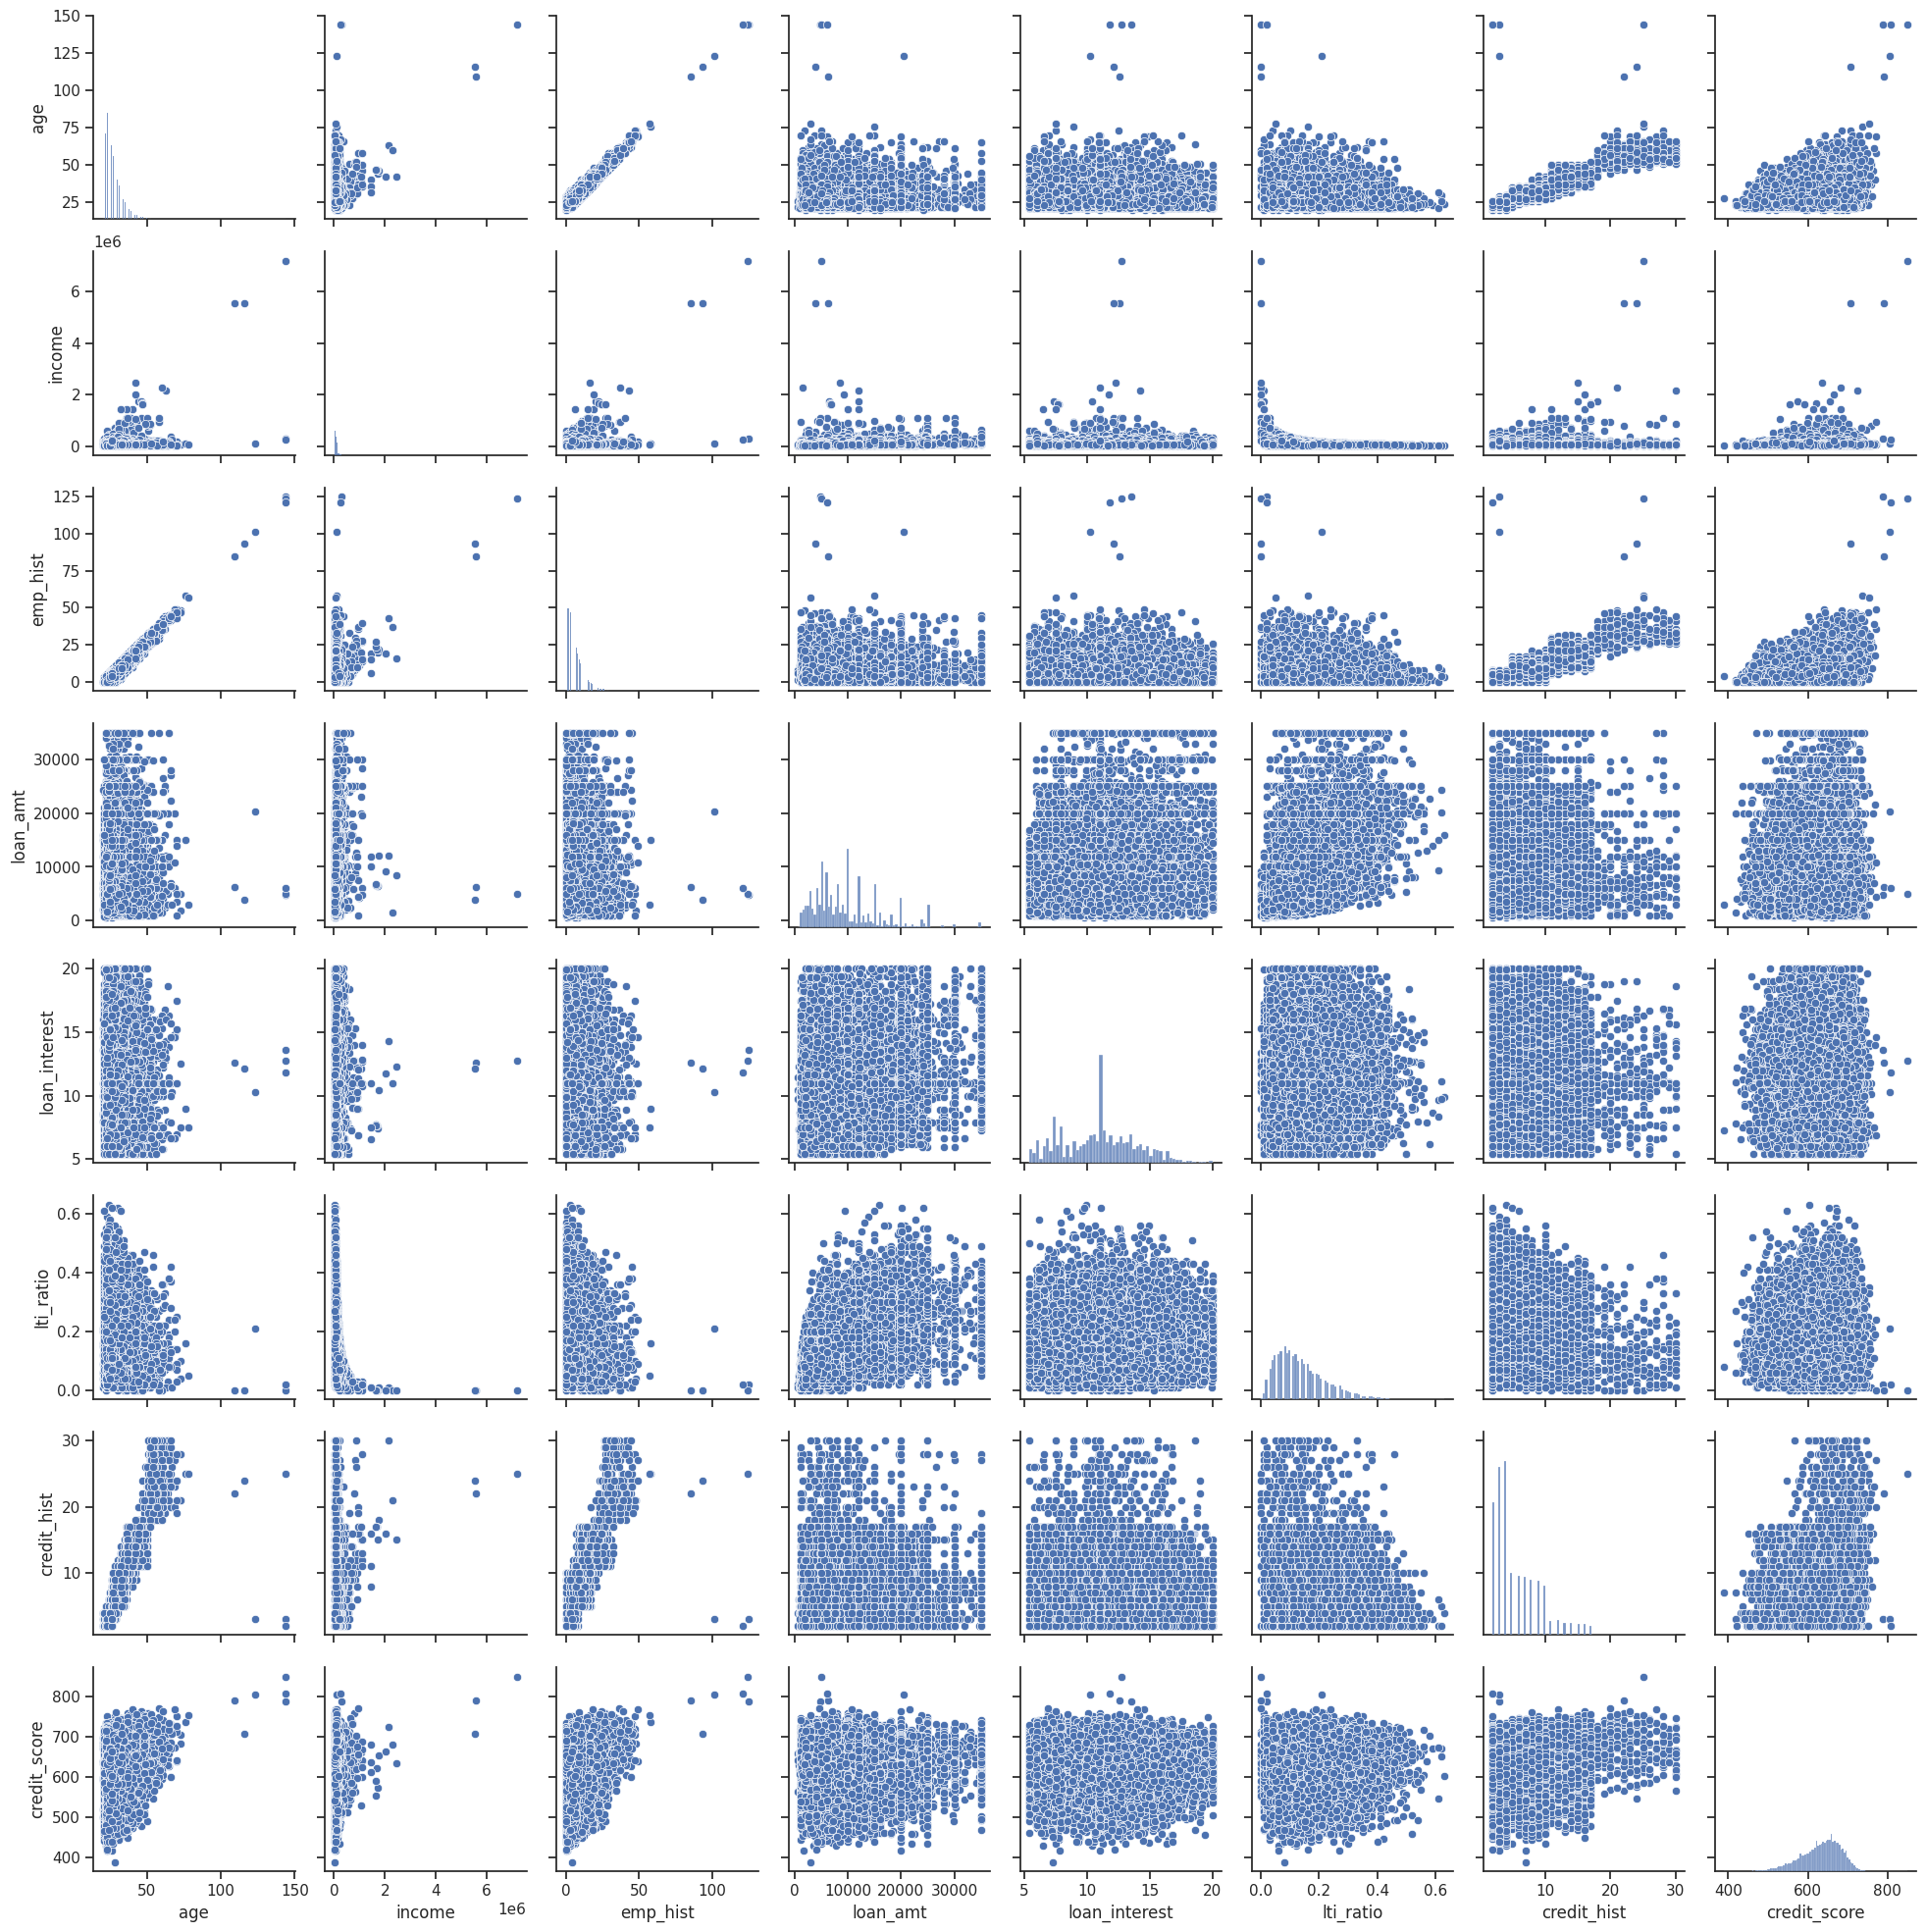

In [ ]:
# pairplot of numerical variables
sns.set_theme(style="ticks")
sns.pairplot(X_traina)

count    36000.000000
mean         0.507028
std          0.499958
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: default_prev, dtype: float64
count    9000.000000
mean        0.511667
std         0.499892
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: default_prev, dtype: float64
count        36000
unique           5
top       bachelor
freq         10772
Name: education, dtype: object
count     36000
unique        4
top        rent
freq      18727
Name: home_status, dtype: object


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count         36000
unique            6
top       education
freq           7381
Name: loan_purpose, dtype: object
count    36000.000000
mean         0.507028
std          0.499958
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: default_prev, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


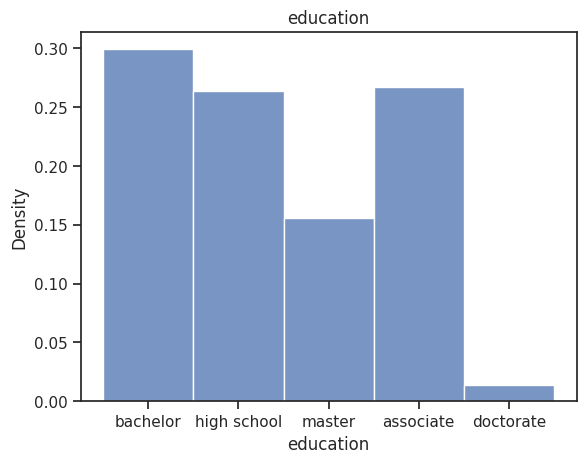

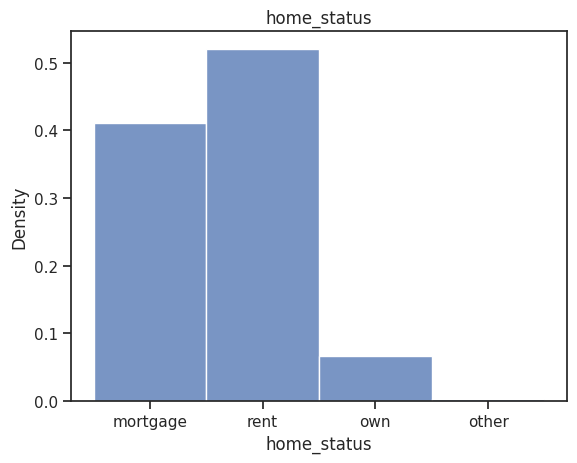

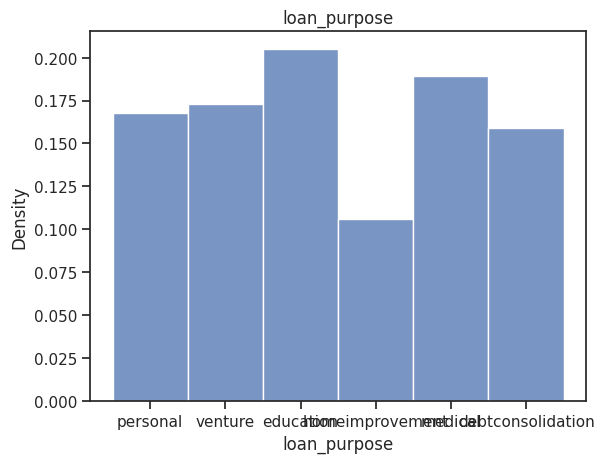

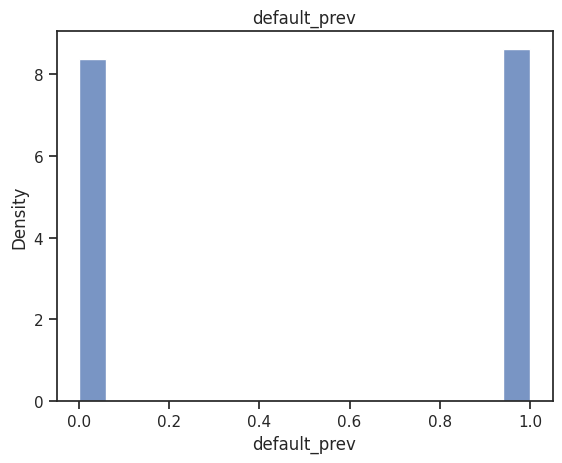

In [ ]:
# Approach for Each Column

# age
# cap outliers at 80, transform skewed, normalise [0-1]
X_traina['age'] = X_traina['age'].clip(upper=80)
X_testa['age'] = X_testa['age'].clip(upper=80)

# gender
# binary mapping to [0,1]

# education
# ordinal mapping to integer, then normalise [0-1]
# ['associate', 'high school', 'bachelor', 'master', 'doctorate']
X_traina['education'] = X_traina['education'].str.lower()
X_testa['education'] = X_testa['education'].str.lower()

# income
# transform skewed, normalise [0-1]

# emp_hist
# cap outliers at 60, transform skewed, normalise [0-1]
X_traina['emp_hist'] = X_traina['emp_hist'].clip(upper=60)
X_testa['emp_hist'] = X_testa['emp_hist'].clip(upper=60)

# home_status
# categorical - non-ordinal, one hot encoding
# ['own', 'mortgage', 'rent', 'other']
X_traina['home_status'] = X_traina['home_status'].str.lower()
X_testa['home_status'] = X_testa['home_status'].str.lower()

# loan_amt
# transform skewed, normalise [0-1]

# loan_purpose
# categorical - non-ordinal, one hot encoding
# ['venture', 'education', 'medical', 'personal', 'homeimprovement', 'debtconsolidation']
X_traina['loan_purpose'] = X_traina['loan_purpose'].str.lower()
X_testa['loan_purpose'] = X_testa['loan_purpose'].str.lower()

# loan_interest
# normalise [0-1]

# lti_ratio
# transform skewed, normalise [0-1]

# credit_hist
# normalise [0-1]

# credit_score
# normalise [0-1]

# default_prev
# binary mapping to [0,1]
# ['yes', 'no']
X_traina['default_prev'] = X_traina['default_prev'].astype(str).str.lower().map({'yes': 1, 'no': 0})
X_testa['default_prev'] = X_testa['default_prev'].astype(str).str.lower().map({'yes': 1, 'no': 0})

print(X_traina['default_prev'].describe())
print(X_testa['default_prev'].describe())

# loan_status  TARGET
# already binary mapping to [0,1]

# show updated fields
# for i, col in enumerate(['age', 'emp_hist']):
#     plt.figure(i)
#     plt.title(X_train[col].name)
#     sns.histplot(data=X_train, x=col, multiple="stack", stat='density')
#     print(X_train[col].describe())

for i, col in enumerate(['education', 'home_status', 'loan_purpose', 'default_prev']):
    plt.figure(i)
    plt.title(X_traina[col].name)
    sns.histplot(data=X_traina, x=col, multiple="stack", stat='density')
    print(X_traina[col].describe(include = ["category"]))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# define coumn transforms
one_hot_cols = ['gender', 'home_status', 'loan_purpose']
ordinal_cols = ['education']
binary_cols = ['default_prev']
skewed_cols = ['income', 'lti_ratio']
other_cols = ['age', 'emp_hist', 'loan_amt', 'loan_interest', 'credit_hist',
              'credit_score', 'default_prev']
# All other numeric columns will be passed through and then scaled
scale_cols = ['age', 'education', 'income', 'emp_hist', 'loan_amt', 'loan_interest',
              'lti_ratio', 'credit_hist', 'credit_score']
# 'loan_status' is not scaled
# education categorical order
edu_order = ['high school', 'associate', 'bachelor', 'master', 'doctorate']

print(f"one-hot: {one_hot_cols}")
print(f"ordinal: {ordinal_cols}")
print(f"binary: {binary_cols}")
print(f"skewed: {skewed_cols}")
print(f"other: {other_cols}")
print(f"scale: {scale_cols}")
print(f"education order: {edu_order}")




one-hot: ['gender', 'home_status', 'loan_purpose']
ordinal: ['education']
binary: ['default_prev']
skewed: ['income', 'lti_ratio']
other: ['age', 'emp_hist', 'loan_amt', 'loan_interest', 'credit_hist', 'credit_score', 'default_prev']
scale: ['age', 'education', 'income', 'emp_hist', 'loan_amt', 'loan_interest', 'lti_ratio', 'credit_hist', 'credit_score']
education order: ['high school', 'associate', 'bachelor', 'master', 'doctorate']


In [ ]:
# Build the Preprocessing Pipeline using ColumnTransformer

# Define preprocessing steps for different column types
preprocessor = ColumnTransformer(
    transformers=[
        # One-Hot Encoding for categorical features
        ('onehot',
         Pipeline([
             ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
         ]),
         one_hot_cols),

        # Ordinal Encoding for ordered categorical features
        ('ordinal',
         Pipeline([
             ('encoder', OrdinalEncoder(categories=[edu_order,
             ], handle_unknown='use_encoded_value', unknown_value=-1)) # Handle unknown values
         ]),
         ordinal_cols),

        # Power Transformation for skewed numeric features
        ('skewed',
         Pipeline([
             ('power_transform', PowerTransformer(method='yeo-johnson')) # Yeo-Johnson handles zero and negative values
         ]),
         skewed_cols),
    ],
    remainder='passthrough' # Keep any columns not specified (e.g., target variable if present)
)

# Combine Preprocessor with MinMaxScaler in a final Pipeline
# The MinMaxScaler should be applied to ALL features after all other transformations.
# The ColumnTransformer outputs a numpy array, so MinMaxScaler will apply to all columns of that array.
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()) # Normalize all features to 0-1 range
])

In [ ]:
# Fit and Transform the Data
trans_Xtrain = full_pipeline.fit_transform(X_traina)
trans_Xtest = full_pipeline.transform(X_testa)

In [ ]:
# column names after transformation
ohe_cols = full_pipeline.named_steps['preprocessor'].named_transformers_['onehot']['encoder'].get_feature_names_out(one_hot_cols)
print(ohe_cols)

trans_cols = list(ohe_cols) + \
            ordinal_cols + \
            skewed_cols + \
            other_cols
print(trans_cols)

['gender_female' 'gender_male' 'home_status_mortgage' 'home_status_other'
 'home_status_own' 'home_status_rent' 'loan_purpose_debtconsolidation'
 'loan_purpose_education' 'loan_purpose_homeimprovement'
 'loan_purpose_medical' 'loan_purpose_personal' 'loan_purpose_venture']
['gender_female', 'gender_male', 'home_status_mortgage', 'home_status_other', 'home_status_own', 'home_status_rent', 'loan_purpose_debtconsolidation', 'loan_purpose_education', 'loan_purpose_homeimprovement', 'loan_purpose_medical', 'loan_purpose_personal', 'loan_purpose_venture', 'education', 'income', 'lti_ratio', 'age', 'emp_hist', 'loan_amt', 'loan_interest', 'credit_hist', 'credit_score', 'default_prev']


In [ ]:
# convert to dataframe
X_train = pd.DataFrame(trans_Xtrain, columns=trans_cols)
X_test = pd.DataFrame(trans_Xtest, columns=trans_cols)

print("\nTransformed DataFrame Head:")
print(X_train.head())
print(X_test.head())


Transformed DataFrame Head:
   gender_female  gender_male  home_status_mortgage  home_status_other  \
0            1.0          0.0                   1.0                0.0   
1            0.0          1.0                   0.0                0.0   
2            1.0          0.0                   1.0                0.0   
3            0.0          1.0                   0.0                0.0   
4            0.0          1.0                   0.0                0.0   

   home_status_own  home_status_rent  loan_purpose_debtconsolidation  \
0              0.0               0.0                             0.0   
1              0.0               1.0                             0.0   
2              0.0               0.0                             0.0   
3              0.0               1.0                             0.0   
4              0.0               1.0                             0.0   

   loan_purpose_education  loan_purpose_homeimprovement  loan_purpose_medical  \
0           

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_female                   36000 non-null  float64
 1   gender_male                     36000 non-null  float64
 2   home_status_mortgage            36000 non-null  float64
 3   home_status_other               36000 non-null  float64
 4   home_status_own                 36000 non-null  float64
 5   home_status_rent                36000 non-null  float64
 6   loan_purpose_debtconsolidation  36000 non-null  float64
 7   loan_purpose_education          36000 non-null  float64
 8   loan_purpose_homeimprovement    36000 non-null  float64
 9   loan_purpose_medical            36000 non-null  float64
 10  loan_purpose_personal           36000 non-null  float64
 11  loan_purpose_venture            36000 non-null  float64
 12  education                       

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

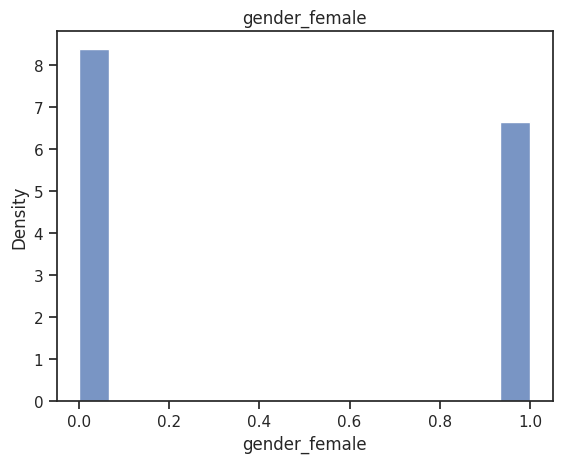

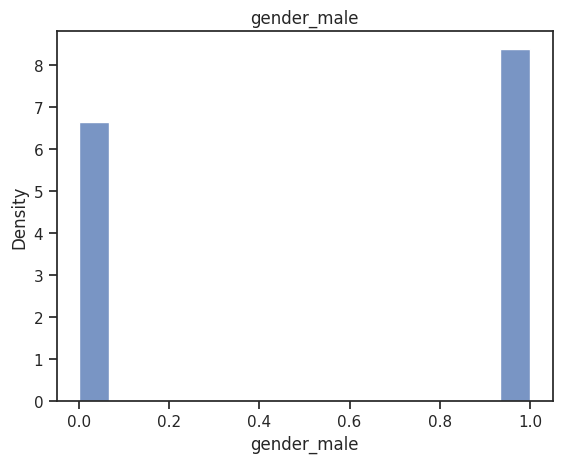

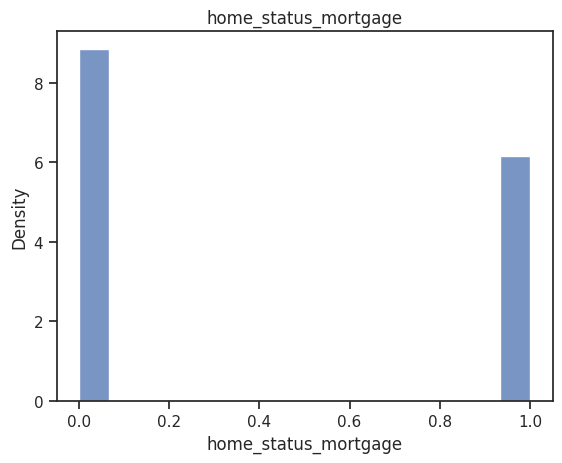

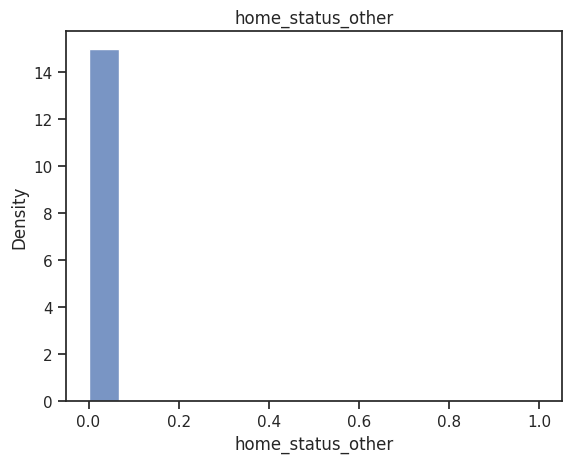

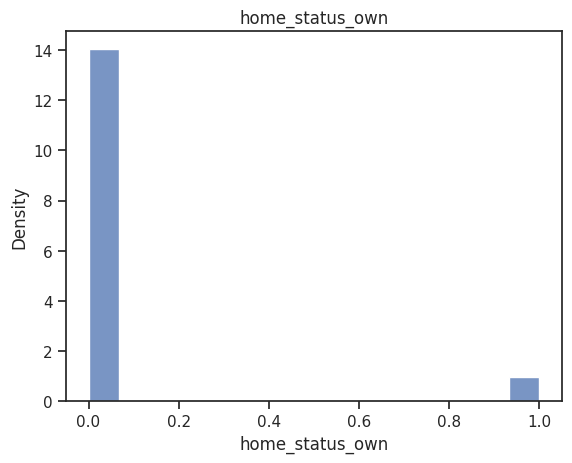

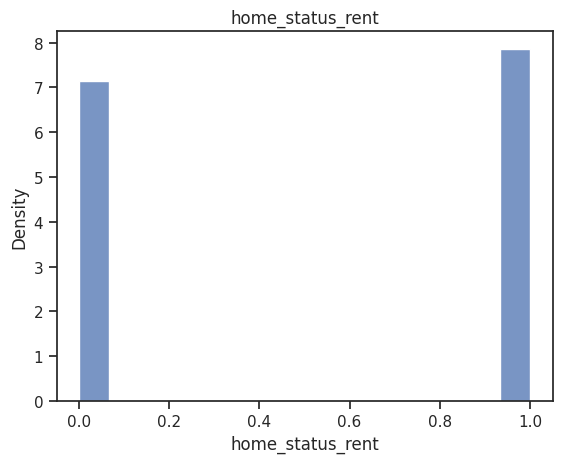

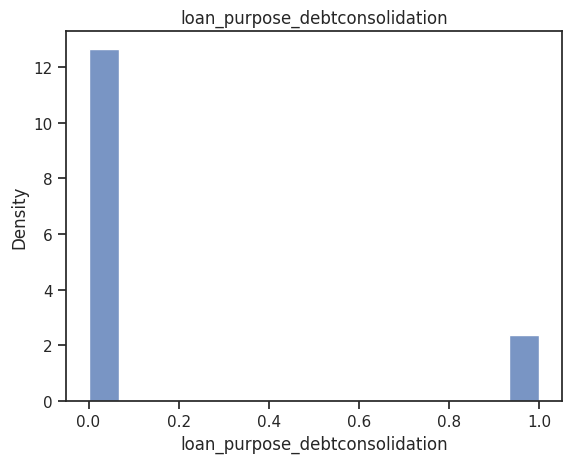

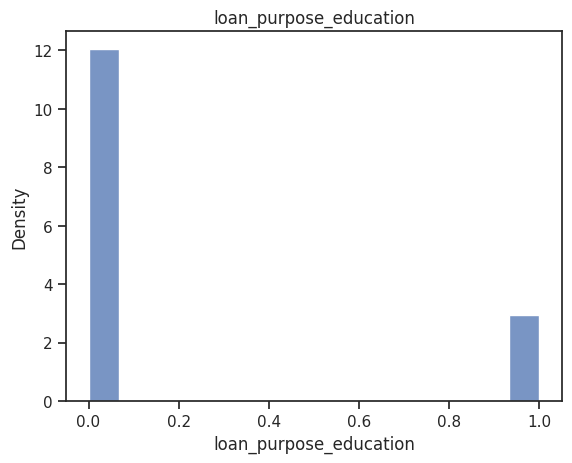

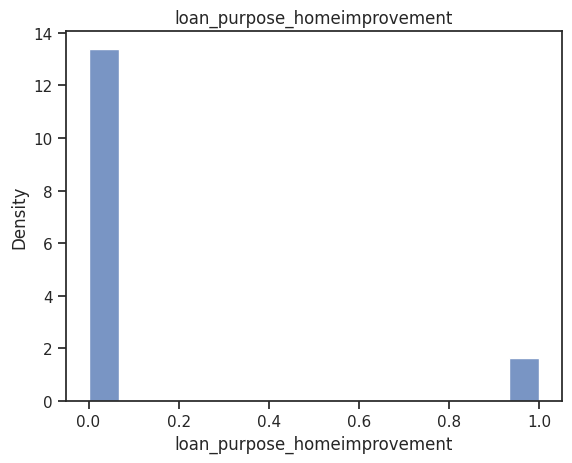

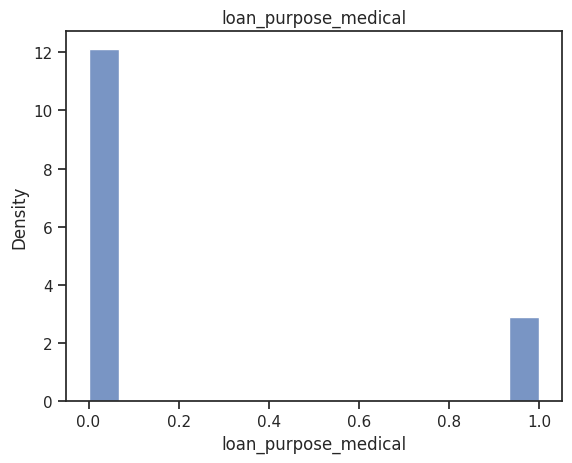

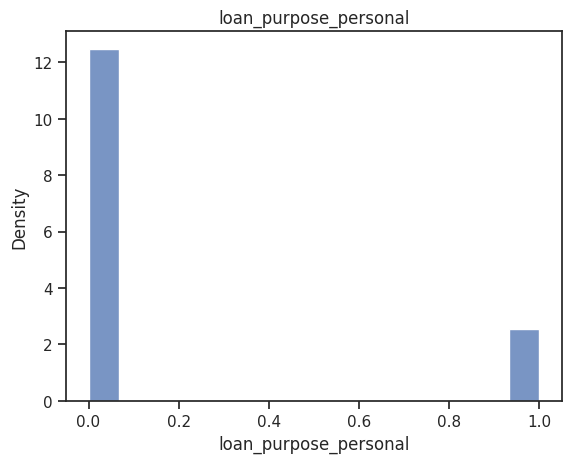

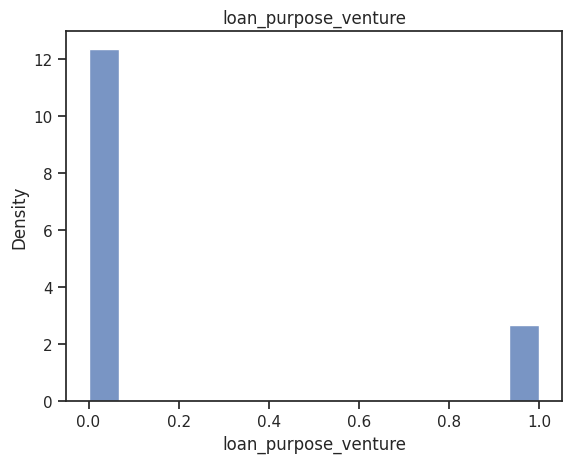

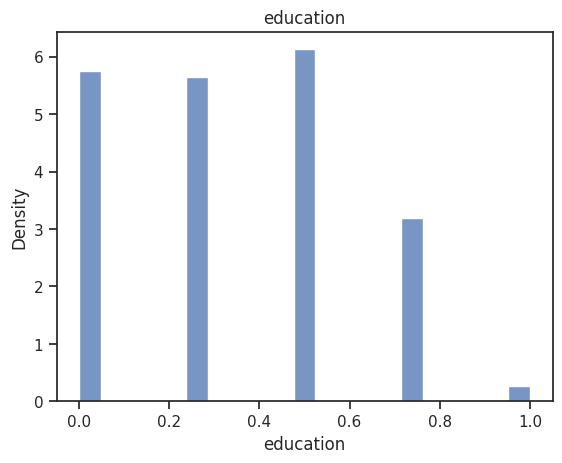

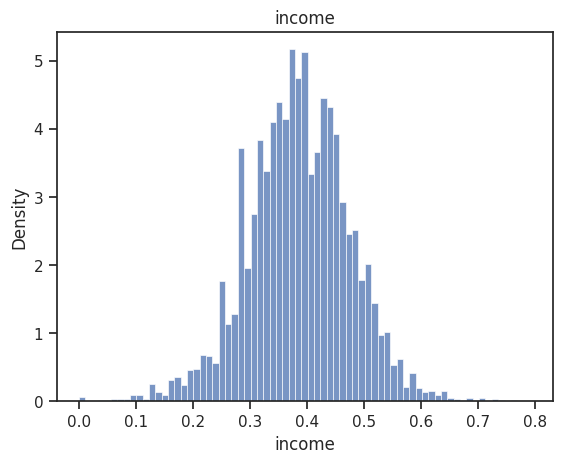

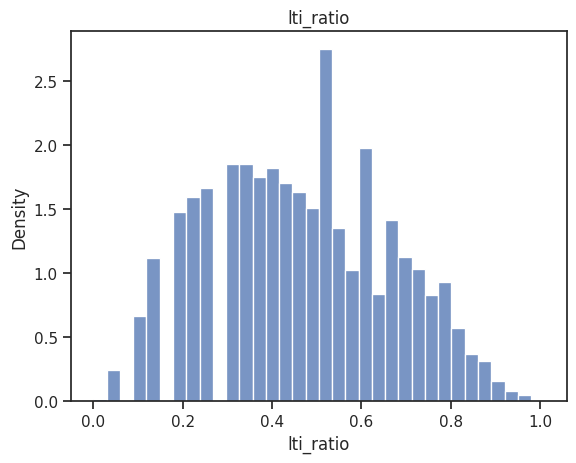

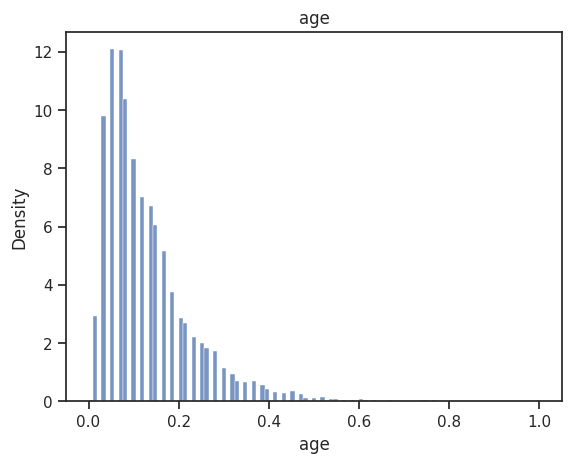

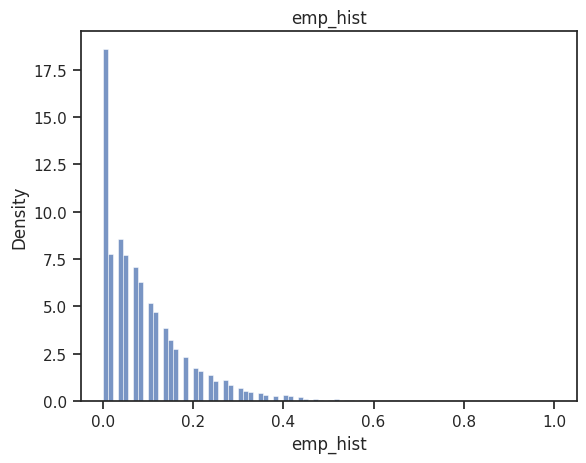

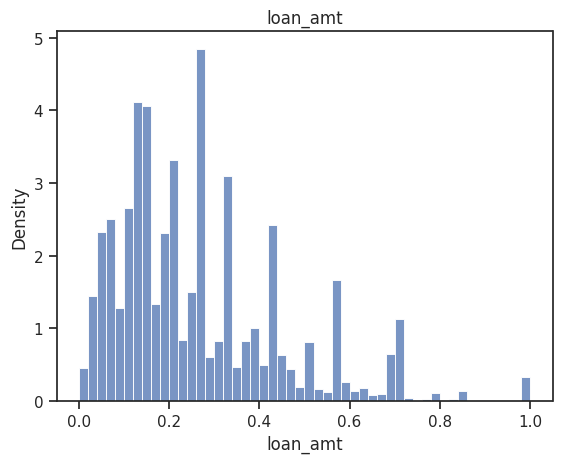

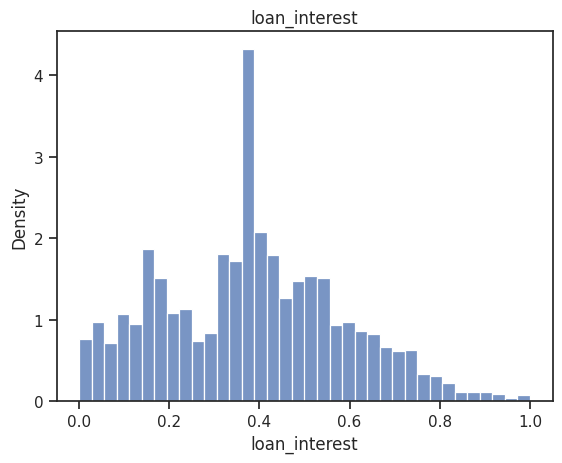

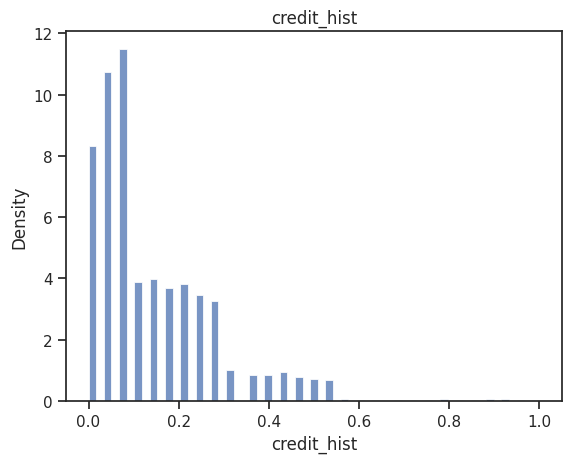

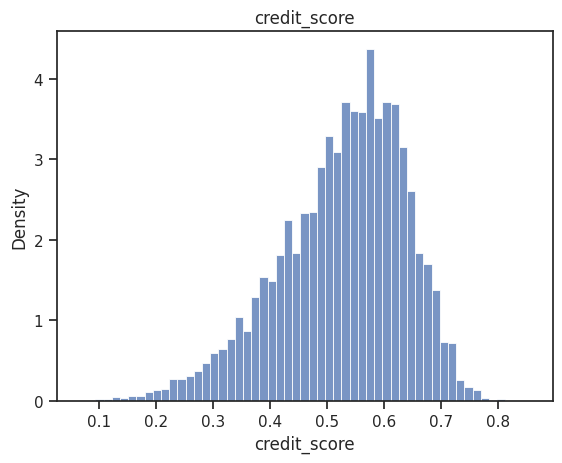

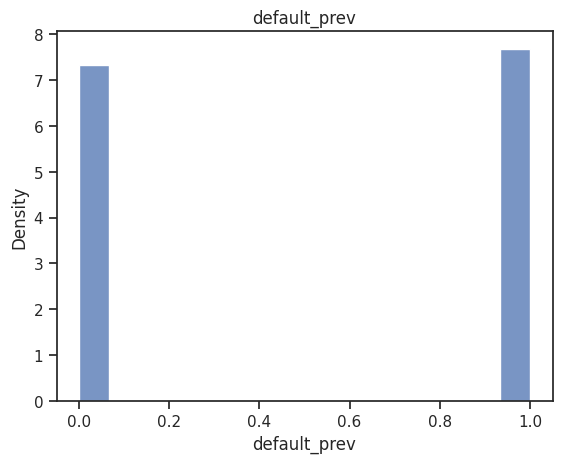

In [ ]:
# test
for i, col in enumerate(X_test.columns):
    plt.figure(i)
    plt.title(X_test[col].name)
    sns.histplot(data=X_test, x=col, multiple="stack", stat='density')


Training set shape (X_train): (36000, 22)
Testing set shape (X_test): (9000, 22)
Training target shape (y_train): (36000, 1)
Testing target shape (y_test): (9000, 1)

Training XGBoost model...
XGBoost model training complete.

--- Model Evaluation ---
Accuracy: 0.9333
Precision: 0.8904
Recall: 0.8000
F1-Score: 0.8428

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000


Confusion Matrix:
[[6792  198]
 [ 402 1608]]


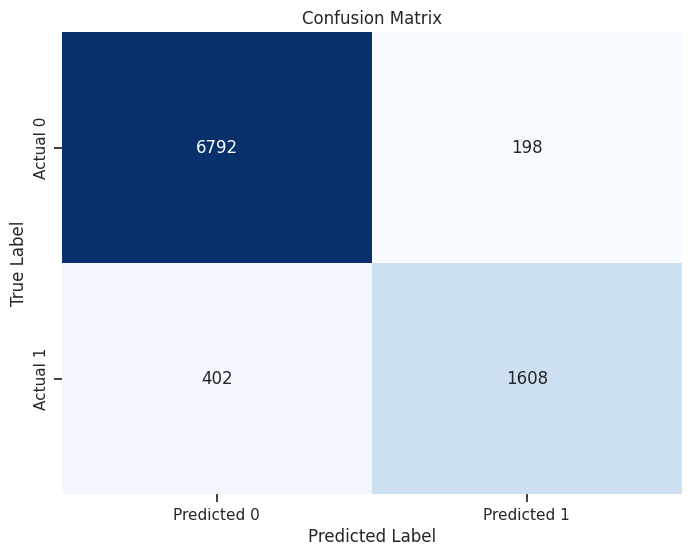

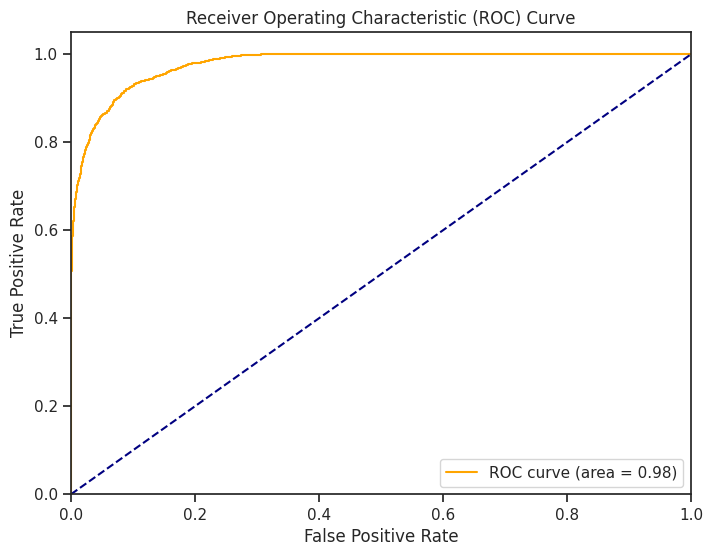

In [ ]:
# fit model and evaluate
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print(f"\nTraining set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

# Train XGBoost Classifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train)
print("XGBoost model training complete.")

# Make Predictions on the Test Set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Evaluate
print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# You can also plot ROC curve and AUC if needed for binary classification
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Save the model as a pickle file for deployment

In [ ]:
# save the model as a pickle file for deployment
import pickle

# output directory: /kaggle/working
model_filename = 'loan_approval_model_v1.pkl'
try:
    with open(model_filename, 'wb') as file:
        pickle.dump(xgb_model, file)
    print(f"\nXGBoost model successfully saved to {model_filename}")
except Exception as e:
    print(f"\nError saving model: {e}")


XGBoost model successfully saved to loan_approval_model_v1.pkl
